### RandomOverSampler

In [1]:
#importing

import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler


In [2]:
#data read

data = pd.read_csv("creditcard.csv")
data.head()
X=data.iloc[:,1:30]
y=data.iloc[:,-1]

In [3]:
# Over-sampling

oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X, y)

y_over = y_over.to_frame()
horizontal_concat = pd.concat([X_over, y_over], axis=1)
data = horizontal_concat


In [4]:

data10= data.sample(frac = 1,random_state=1)
data2 = data10
print(data.shape)
print(data10.shape)
print(len(data10))


(568630, 30)
(568630, 30)
568630


In [5]:

(data_train, data_test) = train_test_split(data10, test_size=0.2, stratify=data10['Class'], random_state=11)

print(data_train.shape)
print(data_test.shape)
print(len(data_train)/len(data_train+data_test))

568630
(454904, 30)
(113726, 30)
0.8


In [6]:
print(data_train.Class.sum())
print(data_test.Class.sum())
print(data_train.Class.sum()/(data_train.Class.sum()+data_test.Class.sum()))

227452
56863
0.8


In [13]:
# data_train.describe()

In [7]:
# separate dependent feature from independent features
(data_train_indep, data_test_indep) = [dt.drop(['Class'], axis=1, inplace=False) for dt in [data_train, data_test]]
(data_train_dep, data_test_dep) = [dt['Class'] for dt in [data_train, data_test]]
print(data_train_indep.shape)
print(data_train_dep.shape)
print(data_test_indep.shape)
print(data_test_dep.shape)

(454904, 29)
(454904,)
(113726, 29)
(113726,)


### Random Forest - RandomOverSampler

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
rfc = RandomForestClassifier()
rfc.fit(data_train_indep, data_train_dep)
pred = rfc.predict(data_test_indep)
n_errors = (pred != data_test_dep).sum()
# print(n_errors)
print("Wrong predictions = {} / {}".format(n_errors, len(data_test_indep)))
print("Accuracy score = {}\n".format(accuracy_score(data_test_dep,pred)))

print("ROC-AUC score = {}\n".format(roc_auc_score(data_test_dep,pred)))

print("Classification Report :")
print(classification_report(data_test_dep,pred))

Wrong predictions = 3 / 113726
Accuracy score = 0.9999736208079067

ROC-AUC score = 0.9999736208079067

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



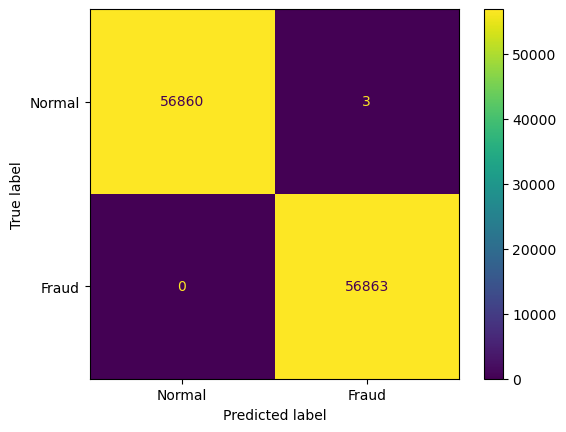

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(data_test_dep,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Normal", "Fraud"])

cm_display.plot()
plt.show()

### Logistic Regression - RandomOverSampler

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(solver='liblinear')
lr.fit(data_train_indep, data_train_dep)

pred = lr.predict(data_test_indep)
n_errors = (pred != data_test_dep).sum()

print("Wrong predictions = {} / {}".format(n_errors, len(data_test_indep)))
print("Accuracy score = {}\n".format(accuracy_score(data_test_dep, pred)))

print("ROC-AUC score = {}\n".format(roc_auc_score(data_test_dep,pred)))

print("Classification Report :")
print(classification_report(data_test_dep,pred))



Wrong predictions = 5782 / 113726
Accuracy score = 0.9491585037722244

ROC-AUC score = 0.9491585037722244

Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.98      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



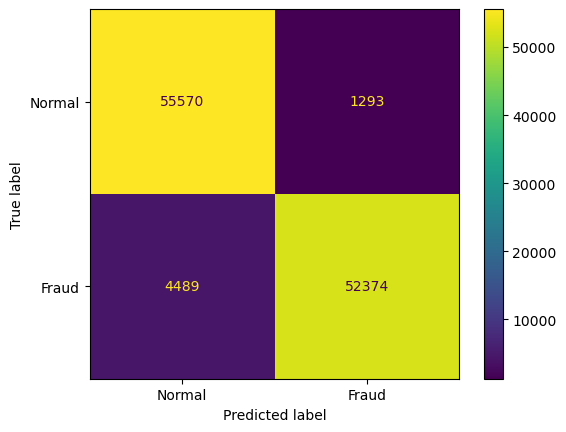

In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(data_test_dep,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Normal", "Fraud"])

cm_display.plot()
plt.show()

### ANN - Random Over Sampler

In [17]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'